In [ ]:
import numpy as np
from numpy.random.mtrand import rand
import networkx as nx
import random
import matplotlib.pyplot as plt
from community import community_louvain
import pandas as pd

In [ ]:
def PT(d,n,num_I,mi1,num_graficos,T):
    PI=[] #Lista com P_INICIAIS
    PT=[] # Lista para armazenar os valores de P_FINAL
    LL=[] # Lista para armazenar os valores das variaçoes do contagio
    GG=[] #Lista com as redes FINAIS
    GI=[] #Lista das redes iniciais
    G1G1=[] #Lista das redes iniciais
    M=np.zeros((T,n))#matriz auxiliar para variaçao de P em cada periodo de Tempo
    F=np.zeros((num_graficos,T))
    B=np.zeros((num_graficos,T))
    # Convert d to a numpy array of size n
    d = np.full(n, d) # Create an array of size n filled with the value of d
    for l in range(num_graficos):
        # CRIANDO UM GRAFO COMPLETO
        #G_Completo = nx.complete_graph(n)
        #G_Completo = nx.to_numpy_array(G_Completo)
        #GG_Completo = nx.complete_graph(n)
        #G=G_Completo
        #G_inicial=G.copy()
        #CRIANDO UM GRAFO ALEATORIO REGULAR
        G = nx.random_regular_graph(d=10, n=100)
        matriz_adjacencia = nx.to_numpy_array(G)
        G=matriz_adjacencia
        G_inicial=G.copy()
        #criando matriz com 7 nodos
        matriz_adjacencia = np.array([
            [0, 1, 1, 0, 0,0,0],
            [1, 0, 1, 1, 0 ,0,0],
            [1, 1, 0, 0, 0, 0,0],
            [0, 1, 0, 0, 1,1,0],
            [0, 0, 0, 1, 0,1,1],
            [0, 0, 0, 1, 1,0,1],
            [0, 0, 0, 0, 1,1,0],
        ])
        #G=matriz_adjacencia
        # Renumerando os nós para que comecem em 1 em vez de 0
        #G = nx.relabel_nodes(G, {i: i + 1 for i in range(G.number_of_nodes())})
        #G_inicial=G.copy()
        #P UNIFORME
        P_limite_inferior_uniforme =-10  # Limite inferior
        P_limite_superior_uniforme = 10  # Limite superior
        P_uniforme = np.random.uniform(P_limite_inferior_uniforme, P_limite_superior_uniforme, size=n)
        P=P_uniforme
        P_inicial=P.copy()
        #Ppara 7 nodos
        #P = [3, -10, 10, 5, 6,-8,-1]

        # d1 LIBERAL OU CONSERVADOR
        d1=np.full(n,d)
        #CRIANDO UM GRAFO ALEATORIO REGULAR
        #G = nx.random_regular_graph(d=10, n=100)
        #matriz_adjacencia = nx.to_numpy_array(G)
        #G=matriz_adjacencia
        #G_inicial=G.copy()
        #I=[0,6]
        I = [random.randint(0, n-1) for _ in range(num_I)]
        #mi1 = 0.3
        # CONTAGIO
        # colocando o I em um vetor z
        Z = np.zeros(n)
        for i in I:
            Z[i] = 1
        #M = np.zeros((T, n))  # matriz na qual guardarei o P em cada etapa T
        #C vetor chave
        C=np.zeros(n)
        infetados=[]
        c=num_I #contador de infetados
        for t in range(T):  # tempo do contagio
            # SI
          D = np.dot(G, Z)
          #c=0 #contador de infetados
          for j in range(n): #j quem foi infetado
            a=random.random()
            #if D[j]==1 and mi1>a: #and mi1*D[i]>a:#aqui nao deveria ser j???
            #if D[j]>=1 and mi1*D[j]>a:
            if D[j]>=1 and mi1>a:
              C[j]=1
              #c=c+1 #contador de infetados
              for i in range(n): #i quem infetou
                if Z[i]>0 and G[i][j]==1:
                  if abs(P[j]-P[i])<=d[j]:
                    P[j]=(P[j]+P[i])/2
                    if P[j]<-10:
                      P[j]=-10
                    elif P[j]>10:
                      P[j]=10
                  else:
                    G[i][j]=0
                    G[j][i]=0
          #infetados.append(c)
          Z=C
          Z=C+Z
          for k in range(n):
            if Z[k]>=1:
              Z[k]=1
              r=sum(Z)
              infetados.append(r)
          M[t]=P
          if t<T-1:
            M[t+1]=P
        infetados
        nao_inf = [n - x for x in infetados]
        B[l]=nao_inf
        F[l]=infetados
        N = np.zeros((T-1,n))
        for k in range(T-1):
          N[k]=abs(M[k+1]-M[k])
        L= np.sum(N, axis=1)
        LL.append(L)
        # Renumerando os nós para que comecem em 1 em vez de 0
        #G = nx.relabel_nodes(G, {i: i + 1 for i in range(G.number_of_nodes())})
        G_inicial=G.copy()
        #return(M)
        PT.append(P)
        GG.append(G) # Adiciona o P atual à lista PT
        #G1G1.append(G1)
    return M,L,LL,GI,GG,PI,PT,G1G1,B,F,infetados

def PT(d,n,num_I,mi1,num_graficos,T)

#REDES BINOMIAL (10)
#d=4
#n=100
#num_I=20
#mi=0.5
#num_graficos=100
#T=20

In [ ]:
M,L,LL,GI,GG,PI,PT,G1G1,B,F,infetados=PT(4,100,20,0.5,100,20)

ValueError: could not broadcast input array from shape (1883,) into shape (20,)

In [ ]:
def PT(d, n, num_I, mi1, num_graficos, T):
    PI=[]  # Lista com P_INICIAIS
    PT=[]  # Lista para armazenar os valores de P_FINAL
    LL=[]  # Lista para armazenar os valores das variaçoes do contágio
    GG=[]  # Lista com as redes FINAIS
    GI=[]  # Lista das redes iniciais
    G1G1=[]  # Lista das redes iniciais
    M = np.zeros((T, n))  # Matriz auxiliar para variação de P em cada período de tempo
    F = np.zeros((num_graficos, T))  # Matriz para infetados
    B = np.zeros((num_graficos, T))  # Matriz para não infetados

    # Convert d to a numpy array of size n
    d = np.full(n, d)  # Cria um array de tamanho n preenchido com o valor de d

    for l in range(num_graficos):
        # Criando a matriz de adjacência de exemplo (substitua com sua lógica de grafo)
        G = nx.random_regular_graph(d=20, n=100)
        matriz_adjacencia = nx.to_numpy_array(G)
        G = matriz_adjacencia
        G_inicial = G.copy()

        # Definir P uniforme
        P_limite_inferior_uniforme = -10  # Limite inferior
        P_limite_superior_uniforme = 10  # Limite superior
        P_uniforme = np.random.uniform(P_limite_inferior_uniforme, P_limite_superior_uniforme, size=n)
        P = P_uniforme
        P_inicial = P.copy()

        # Definir infectados iniciais
        I = [random.randint(0, n - 1) for _ in range(num_I)]

        # Contágio
        Z = np.zeros(n)
        for i in I:
            Z[i] = 1

        C = np.zeros(n)  # vetor chave
        infetados = []  # Lista de infectados ao longo do tempo

        for t in range(T):  # Tempo do contágio
            D = np.dot(G, Z)  # Contato com os infectados
            for j in range(n):  # Verificar se o nó j será infectado
                a = random.random()
                if D[j] >= 1 and mi1 > a:
                    C[j] = 1
                    for i in range(n):  # Propagação do contágio
                        if Z[i] > 0 and G[i][j] == 1:
                            if abs(P[j] - P[i]) <= d[j]:
                                P[j] = (P[j] + P[i]) / 2
                                P[j] = max(-10, min(10, P[j]))  # Limitar P a [-10, 10]
                            else:
                                G[i][j] = 0
                                G[j][i] = 0

            Z = C + Z
            Z = np.clip(Z, 0, 1)  # Garantir que Z fique entre 0 e 1
            infetados.append(np.sum(Z))  # Contagem de infectados em cada período

        # Garantir que infetados tenha o tamanho exato de T
        if len(infetados) > T:
            infetados = infetados[:T]
        else:
            infetados.extend([infetados[-1]] * (T - len(infetados)))  # Preencher com o último valor

        nao_inf = [n - x for x in infetados]

        # Armazenar nas matrizes B e F
        B[l] = nao_inf
        F[l] = infetados

        # Cálculo das variações de P ao longo do tempo
        N = np.zeros((T - 1, n))
        for k in range(T - 1):
            N[k] = abs(M[k + 1] - M[k])
        L = np.sum(N, axis=1)
        LL.append(L)

        # Armazenar as redes e o P final
        PT.append(P)
        GG.append(G)

    return M, L, LL, GI, GG, PI, PT, G1G1, B, F, infetados



PT(d, n, num_I, mi1, num_graficos, T)

In [ ]:
# Chamar a função com os parâmetros corretos
M, L, LL, GI, GG, PI, PT, G1G1, B, F, infetados = PT(4, 100, 5, 0.2, 100, 20)


#FORMAÇÃO DE OPINIAO

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np

def criar_dataframe_componentes_conexos_com_P(GG, PT):
    # Lista para armazenar os dados
    dados = []

    # Loop pelos grafos na lista GG
    for i, matriz_adjacencia in enumerate(GG):
        # Cria o grafo a partir da matriz de adjacência
        G = nx.from_numpy_array(matriz_adjacencia)

        # Calcula os componentes conexos
        componentes_conexos = list(nx.connected_components(G.to_undirected()))

        # Listas para armazenar médias, desvios padrões e tamanhos
        medias = []
        desvios = []
        tamanhos = []

        # Para cada componente conexo, calcular a média, o desvio padrão e o tamanho
        P_atual = PT[i]  # P para o grafo atual
        for componente in componentes_conexos:
            # Obtenho os valores de P para os nós do componente
            valores_P = [P_atual[node] for node in componente]

            # Calculo a média, desvio padrão e o tamanho do componente
            media_P = np.mean(valores_P)
            desvio_P = np.std(valores_P)
            tamanho_componente = len(componente)

            # Adiciono esses valores às listas
            medias.append(media_P)
            desvios.append(desvio_P)
            tamanhos.append(tamanho_componente)

        # Identificar o componente com a menor média de P e o tamanho
        media_minima = min(medias)
        index_min = medias.index(media_minima)
        tamanho_min = tamanhos[index_min]  # Número de integrantes do menor componente (com menor média)
        desvio_min = desvios[index_min]    # Desvio padrão do menor componente (com menor média)

        # Identificar o componente com a maior média de P e o tamanho
        media_maxima = max(medias)
        index_max = medias.index(media_maxima)
        tamanho_max = tamanhos[index_max]  # Número de integrantes do maior componente (com maior média)
        desvio_max = desvios[index_max]    # Desvio padrão do maior componente (com maior média)

        # Adiciona os dados da linha para o grafo atual
        dados.append([i + 1, len(componentes_conexos), medias, tamanhos, desvios,
                      media_minima, desvio_min, tamanho_min,
                      media_maxima, desvio_max, tamanho_max])

    # Cria o DataFrame com as colunas especificadas
    df = pd.DataFrame(dados, columns=[
        'Grafo', 'Componentes Conexos', 'Médias de P por Componente', 'Tamanho de cada Componente', 'Desvio Padrão de P',
        'Menor Média de P', 'Desvio Padrão do Componente com Menor Média', 'Tamanho do Componente com Menor Média',
        'Maior Média de P', 'Desvio Padrão do Componente com Maior Média', 'Tamanho do Componente com Maior Média'
    ])

    return df

# Exemplo de uso:
# GG é a lista de matrizes de adjacência e PT a lista de vetores P, ambos gerados pela função PT
df_componentes_con_P = criar_dataframe_componentes_conexos_com_P(GG, PT)
df_componentes_con_P

,Grafo,Componentes Conexos,Médias de P por Componente,Tamanho de cada Componente,Desvio Padrão de P,Menor Média de P,Desvio Padrão do Componente com Menor Média,Tamanho do Componente com Menor Média,Maior Média de P,Desvio Padrão do Componente com Maior Média,Tamanho do Componente com Maior Média
0,1,2,"[-0.2504573749584501, 9.590161269041822]","[99, 1]","[4.996722608393166, 0.0]",-0.250457,4.996723,99,9.590161,0.000000,1
1,2,2,"[0.6635183844350925, -9.99970017805406]","[99, 1]","[4.949255348481888, 0.0]",-9.999700,0.000000,1,0.663518,4.949255,99
2,3,1,[-0.1666002301570096],[100],[5.210047933454779],-0.166600,5.210048,100,-0.166600,5.210048,100
3,4,1,[-0.27019445130799397],[100],[5.3912608329123595],-0.270194,5.391261,100,-0.270194,5.391261,100
4,5,1,[0.40870421692311837],[100],[5.281796140905758],0.408704,5.281796,100,0.408704,5.281796,100
...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,[-0.8350909937179252],[100],[5.137427819290616],-0.835091,5.137428,100,-0.835091,5.137428,100
96,97,3,"[6.048065169085595, -8.993148838413624, -1.891...","[52, 27, 21]","[0.5452245946847329, 0.24090740392457108, 0.14...",-8.993149,0.240907,27,6.048065,0.545225,52
97,98,1,[0.5684263906822677],[100],[5.6295118290787],0.568426,5.629512,100,0.568426,5.629512,100
98,99,1,[-0.6006790922630978],[100],[5.6727183115262125],-0.600679,5.672718,100,-0.600679,5.672718,100


#100 GRAFICOS DE P

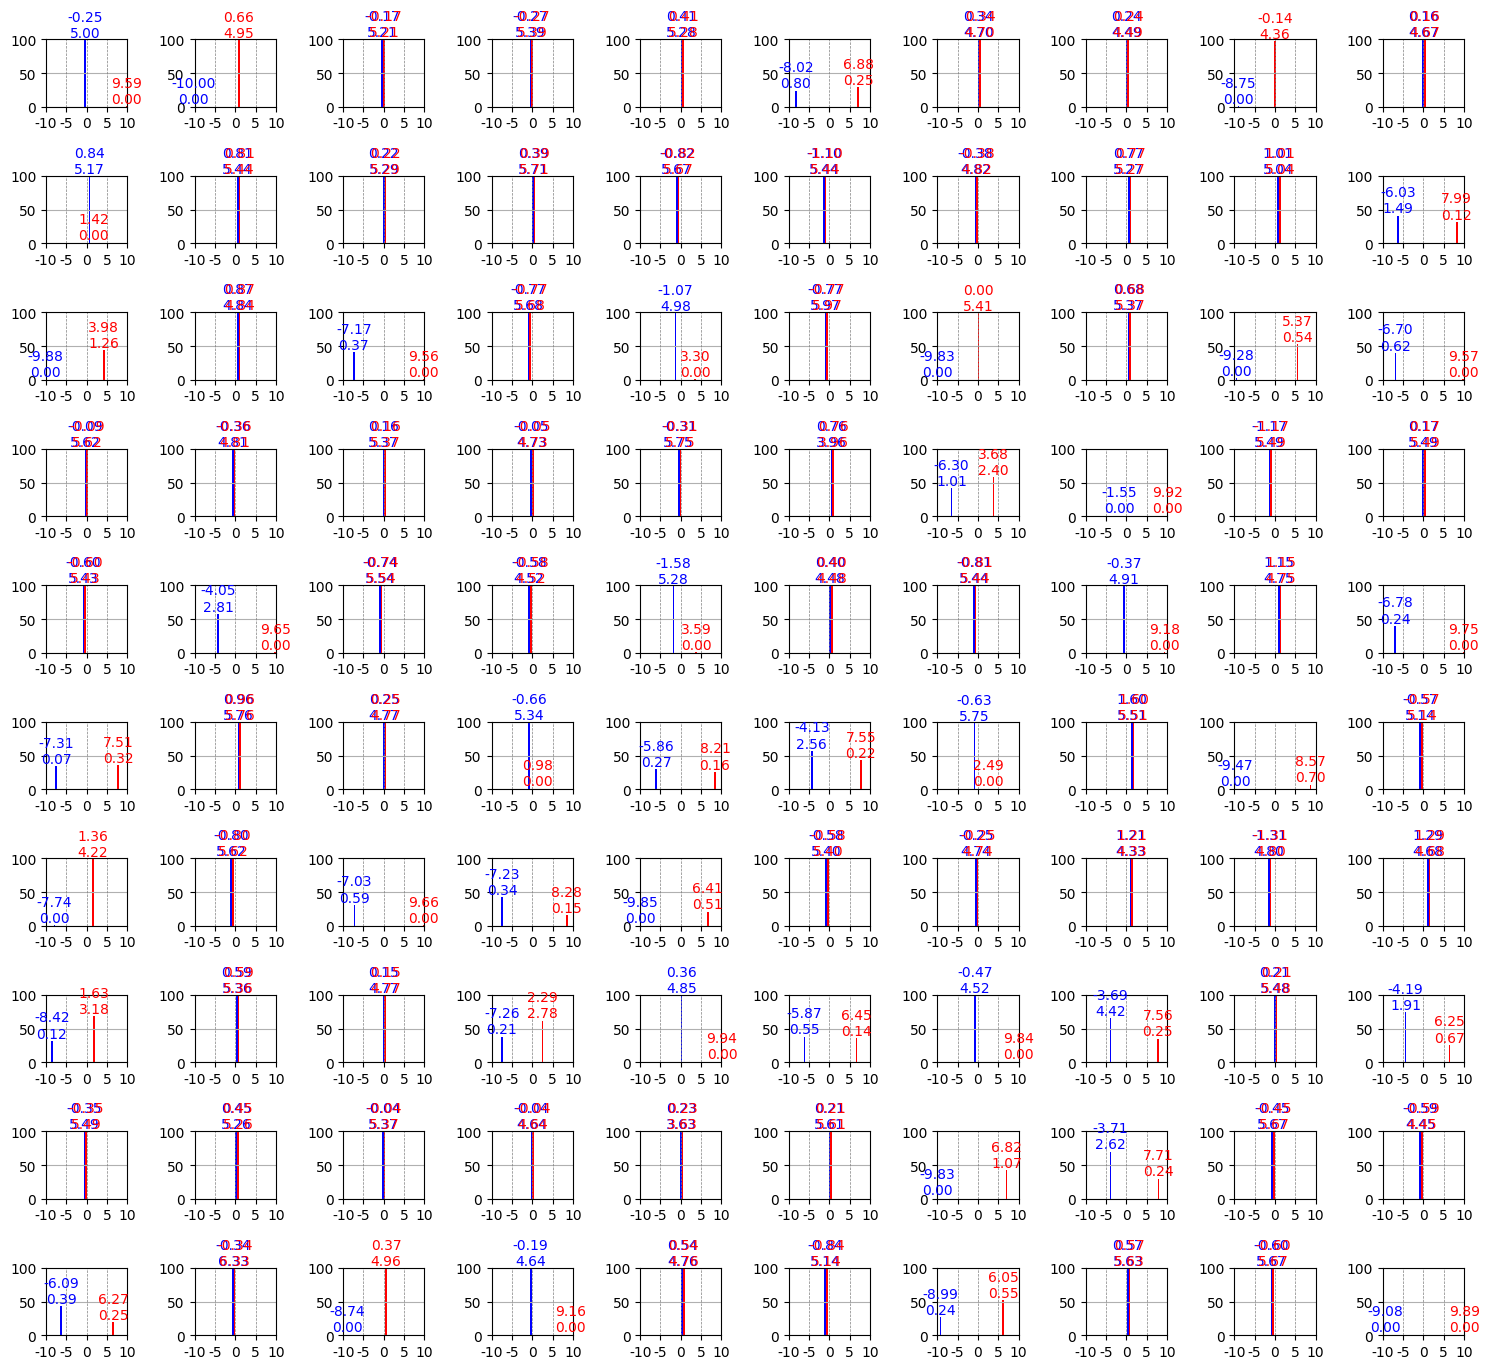

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gerar_graficos_em_barras(df):
    # Configurar a figura e a grade de subgráficos
    fig, axes = plt.subplots(10, 10, figsize=(15, 15))
    #fig.suptitle('Gráficos de Barras: Menor e Maior Média de P com Tamanhos de Componentes', fontsize=16)

    # Loop sobre cada linha do DataFrame (100 gráficos)
    for i in range(len(df)):
        # Extrair os dados da linha atual
        menor_media = df['Menor Média de P'].iloc[i]
        maior_media = df['Maior Média de P'].iloc[i]
        tamanho_menor_media = df['Tamanho do Componente com Menor Média'].iloc[i]
        tamanho_maior_media = df['Tamanho do Componente com Maior Média'].iloc[i]
        desvio_menor_media = df['Desvio Padrão do Componente com Menor Média'].iloc[i]
        desvio_maior_media = df['Desvio Padrão do Componente com Maior Média'].iloc[i]

        # Determinar a posição do subgráfico
        ax = axes[i // 10, i % 10]  # i // 10 para a linha, i % 10 para a coluna

        # Criar gráficos de barras finas
        bar_width = 0.4  # Largura das barras
        ax.bar([menor_media - bar_width/2, maior_media + bar_width/2],
               [tamanho_menor_media, tamanho_maior_media],
               width=bar_width,  # Ajustando a largura das barras
               color=['blue', 'red'])

        # Configurar o gráfico
        #ax.set_ylabel('Tamanho do Componente')
        #ax.set_ylim(0, max(tamanho_menor_media, tamanho_maior_media) + 1)  # Ajustar limites do eixo y
        ax.set_ylim(0, 100)  # Ajustar limites do eixo y

        # Definindo os limites do eixo x
        ax.set_xlim(-10, 10)  # Ajustar limites para o eixo x

        # Adicionar linhas de grade
        ax.grid(axis='y')

        # Ajustando os rótulos do eixo x
        ax.set_xticks([-10, -5, 0, 5, 10])  # Ticks no eixo x
        ax.set_xticklabels([-10, -5, 0, 5, 10])  # Rótulos para o eixo x

        # Adicionando linhas verticais para -10, -5, 0, 5 e 10
        for x in [-10, -5, 0, 5, 10]:  # Linhas verticais específicas
            ax.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)  # Linhas verticais

        # Adicionando anotações acima das barras
        ax.text(menor_media - bar_width/2, tamanho_menor_media + 0.2,
                f'{menor_media:.2f}\n{desvio_menor_media:.2f}',
                ha='center', va='bottom', fontsize=10, color='blue')

        ax.text(maior_media + bar_width/2, tamanho_maior_media + 0.2,
                f'{maior_media:.2f}\n{desvio_maior_media:.2f}',
                ha='center', va='bottom', fontsize=10, color='red')

    # Ajustar layout para evitar sobreposição
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # espaço para título
    plt.show()

gerar_graficos_em_barras(df_componentes_con_P)

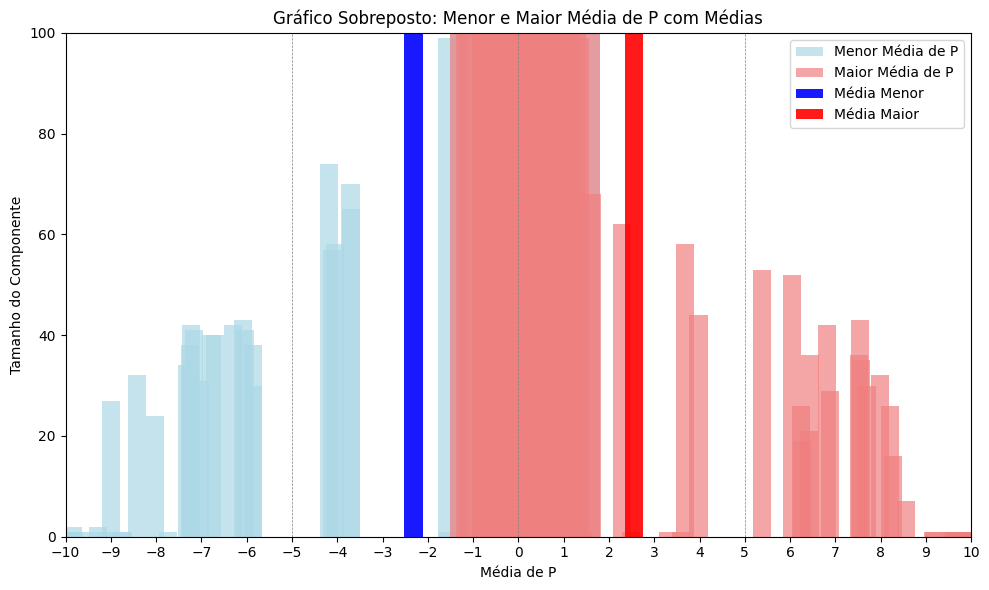

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gerar_grafico_sobreposto_com_media(df):
    # Extrair os dados necessários
    tamanho_menor_media = df['Tamanho do Componente com Menor Média']
    tamanho_maior_media = df['Tamanho do Componente com Maior Média']
    menor_media = df['Menor Média de P']
    maior_media = df['Maior Média de P']

    # Calcular as médias
    media_menor = np.mean(menor_media)
    media_maior = np.mean(maior_media)

    # Configurar a figura
    plt.figure(figsize=(10, 6))

    # Criar gráficos de barras sobrepostos
    index = np.arange(len(df))  # Índice para cada gráfico
    bar_width = 0.4  # Largura das barras

    # Criar barras para Menor e Maior Média com cores menos intensas
    bars1 = plt.bar(menor_media, tamanho_menor_media, width=bar_width, color='lightblue', alpha=0.7, label='Menor Média de P')
    bars2 = plt.bar(maior_media, tamanho_maior_media, width=bar_width, color='lightcoral', alpha=0.7, label='Maior Média de P')

    # Adicionar barras de média
    plt.bar(media_menor, max(tamanho_menor_media) + 0.5, width=bar_width, color='blue', alpha=0.9, label='Média Menor')
    plt.bar(media_maior, max(tamanho_maior_media) + 0.5, width=bar_width, color='red', alpha=0.9, label='Média Maior')

    # Configurar o gráfico
    plt.xlabel('Média de P')
    plt.ylabel('Tamanho do Componente')
    plt.title('Gráfico Sobreposto: Menor e Maior Média de P com Médias')
    plt.ylim(0, 100)  # Limite do eixo Y até 7

    # Ajustar o eixo X para ir de -10 a 10
    plt.xlim(-10, 10)

    # Adicionar linhas verticais para -10, -5, 0, 5 e 10
    plt.axvline(-10, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(-5, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(5, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(10, color='gray', linestyle='--', linewidth=0.5)

    # Definir as marcas do eixo X
    plt.xticks(np.arange(-10, 11, 1))  # Marca de -10 a 10

    # Adicionar legenda
    plt.legend()

    # Mostrar gráfico
    plt.tight_layout()
    plt.show()

# Exemplo de uso
gerar_grafico_sobreposto_com_media(df_componentes_con_P)

#ANALISE DO CONTAGIO
#100 GRAFICOS

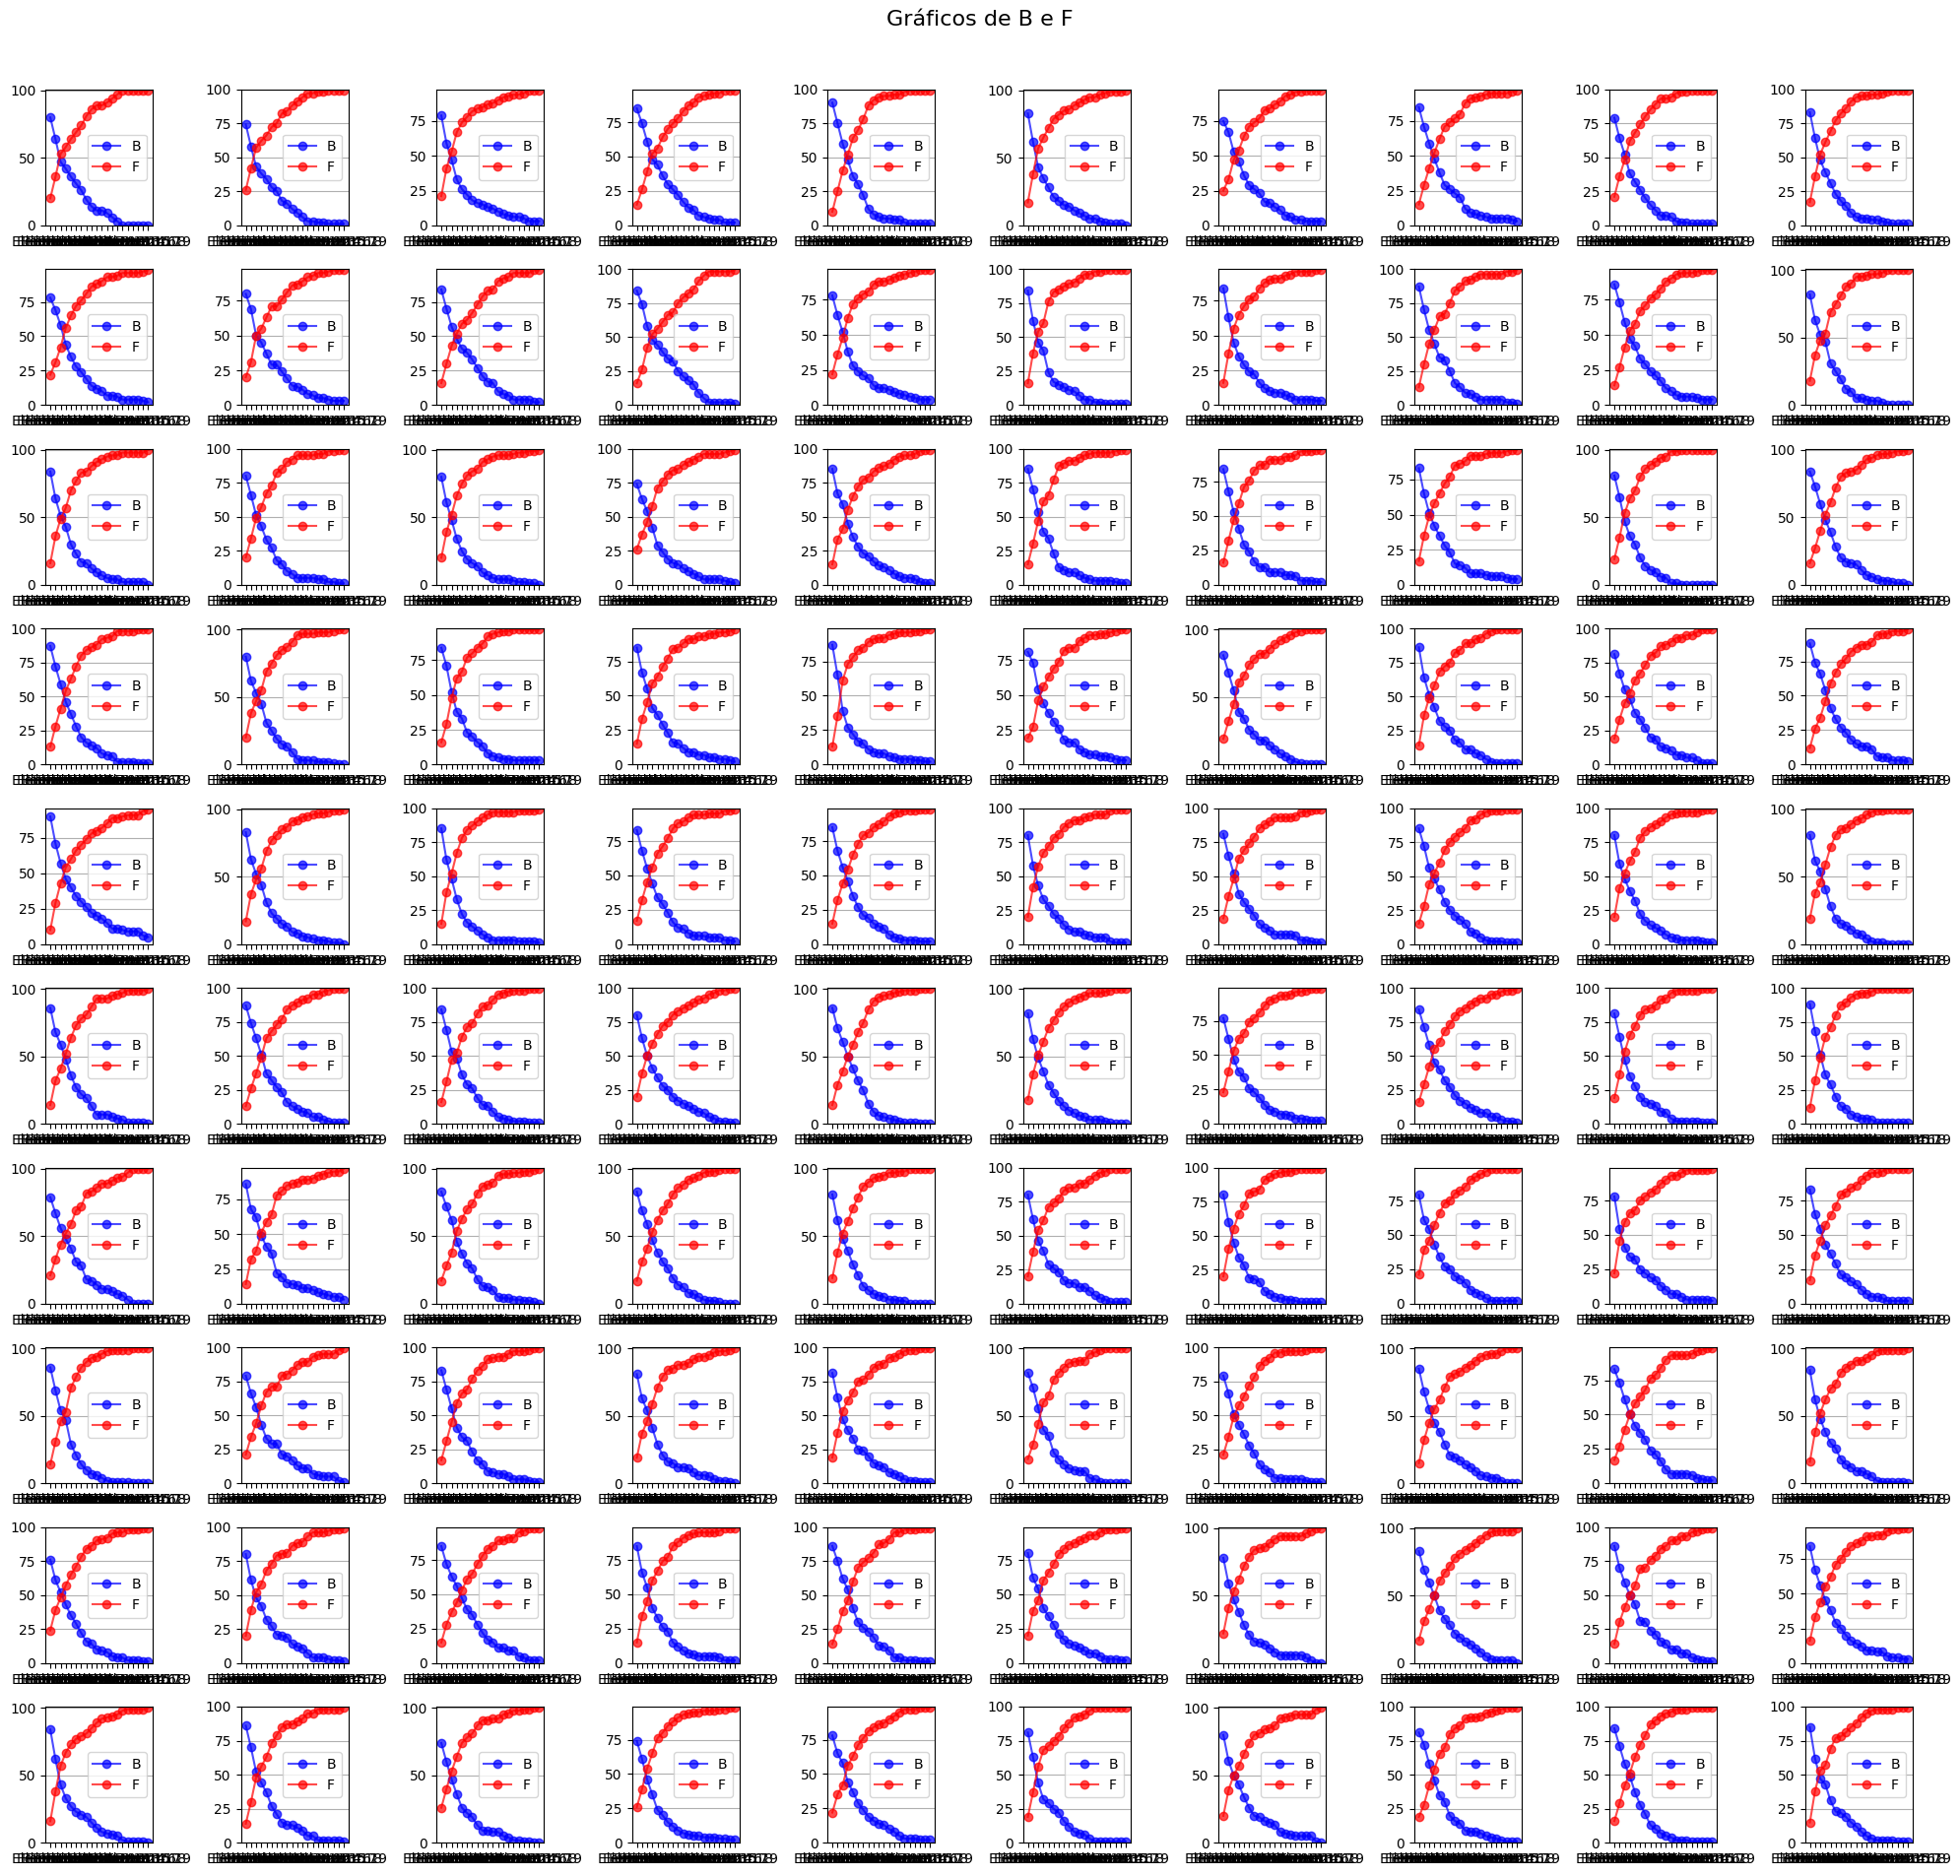

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gerar_graficos_B_F(B, F):
    # Configurar a figura e a grade de subgráficos
    fig, axes = plt.subplots(10, 10, figsize=(20, 20))

    # Loop sobre cada gráfico
    for i in range(100):
        # Extrair os dados de B e F para a linha i
        b_values = B[i]  # Valores de B da linha i
        f_values = F[i]  # Valores de F da linha i

        # Determinar a posição do subgráfico
        ax = axes[i // 10, i % 10]  # i // 10 para a linha, i % 10 para a coluna

        # Criar gráficos de linha
        ax.plot(np.arange(len(b_values)), b_values, marker='o', color='blue', label='B', alpha=0.7)
        ax.plot(np.arange(len(f_values)), f_values, marker='o', color='red', label='F', alpha=0.7)

        # Configurar o gráfico
        ax.set_ylim(0, max(max(b_values), max(f_values)) + 1)  # Ajustar limites do eixo y
        ax.set_xticks(np.arange(len(b_values)))  # Ajustar os ticks do eixo x
        ax.set_xticklabels([f'Elemento {j}' for j in range(len(b_values))])  # Rótulos no eixo x
        ax.grid(axis='y')
        ax.legend()

    # Ajustar layout para evitar sobreposição
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # espaço para título
    plt.suptitle('Gráficos de B e F', fontsize=16)
    plt.show()

# Exemplo de uso
gerar_graficos_B_F(B, F)

#CONTAGIO
1 SO GRAFICO

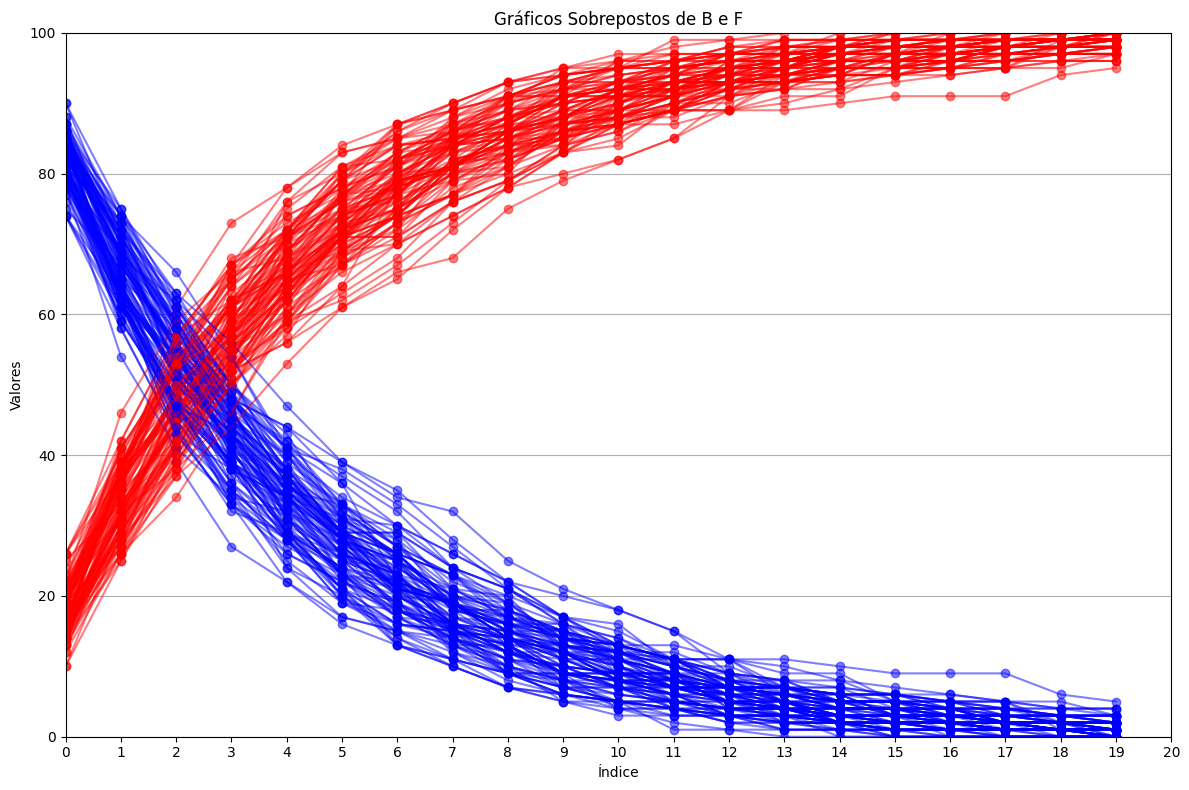

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gerar_grafico_empilhado_B_F(B, F):
    # Configurar a figura
    plt.figure(figsize=(12, 8))

    # Loop sobre cada gráfico
    for i in range(100):
        # Extrair os dados de B e F para a linha i
        b_values = B[i]  # Valores de B da linha i
        f_values = F[i]  # Valores de F da linha i

        # Criar gráficos de linha
        plt.plot(np.arange(len(b_values)), b_values, marker='o', color='blue', alpha=0.5)
        plt.plot(np.arange(len(f_values)), f_values, marker='o', color='red', alpha=0.5)

    # Configurar o gráfico
    plt.ylim(0,100)  # Ajustar limites do eixo y para 0 a 20 (ajuste baseado na faixa esperada dos dados)
    plt.xlim(0, 20)  # Ajustar limites do eixo x para 0 a 20
    plt.xticks(np.arange(0, 21, 1))  # Rótulos no eixo x de 0 a 20
    plt.grid(axis='y')
    plt.title('Gráficos Sobrepostos de B e F')
    plt.xlabel('Índice')
    plt.ylabel('Valores')

    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()

# Exemplo de uso
gerar_grafico_empilhado_B_F(B, F)
